# ML4DS - Model Selection

## Introduction

You will explore the various options for model selection on a *clustering* task.

In the first section, you will use synthetic data, where we know the true number of clusters. In the second (which will make up the assessed task), you will compare multiple methods for model selection on a real dataset.

## Import Packages

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import silhouette_score
from sklearn import mixture
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import itertools
from scipy import linalg
import matplotlib as mpl


# Part 1: synthetic data

### Generate some data

Make data from a mixture of gaussians using sklearn `make_blobs` method. Try experimenting with:
- The number of centers
- the `cluster_std`
- The total number of samples

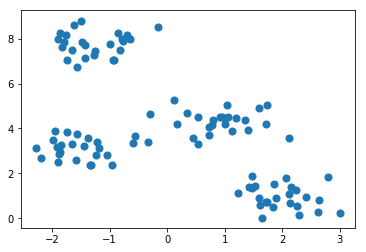

In [54]:
X, y_true = make_blobs(n_samples=100, centers=4,
                       cluster_std=0.5
                       , random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

# Clustering - K-Means Example

Using the `KMeans` model, try and optimise, plot a graph of $K$ versus the `inertia_` value of the clustering. The `inertia_` value is the quantity that is minimised when K-means is training: the total sum of squared errors between the observations and the cluster centre to which they are assigned.

__Question__: what do you notice about this curve? Do you think you could use it to choose the correct number of clusters? See e.g. https://en.wikipedia.org/wiki/Elbow_method_(clustering). What happens when you vary the parameters used to generate the data (above)

#### 'elbow' appears sharper with a low standard deviation (dispertion between points is less and so optimal K is more certain?


__Question__ Choose K using the Elbow Method

__Question__: using the value of $K$ you have chosen, fit the clustering and then use the following code to plot the data coloured by cluster assignment. You can get the cluster assignment using the following code:
`y_kmeans = kmeans.predict(X)`

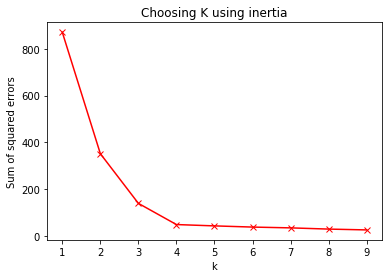

In [55]:
inertia_vals = []
for k in range(1,10):
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    inertia_vals.append(km.inertia_)
    
plt.plot(K, inertia_vals, 'rx-')
plt.xlabel('k')
plt.ylabel('Sum of squared errors')
plt.title('Choosing K using inertia')
plt.show()

### K = 4 using elbow method

In [56]:
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(X)
y_kmeans = kmeans.predict(X)

y_kmeans

array([3, 1, 3, 3, 3, 3, 0, 1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 3, 1,
       0, 2, 3, 0, 0, 3, 2, 2, 2, 1, 2, 2, 0, 3, 1, 2, 1, 0, 3, 0, 1, 0,
       0, 1, 2, 0, 3, 3, 3, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 3, 2, 1,
       0, 0, 2, 3, 1, 2, 3, 1, 3, 3, 0, 0, 2, 2, 2, 1, 0, 3, 2, 0, 2, 2,
       3, 3, 3, 0, 3, 0, 0, 1, 1, 0, 1, 3], dtype=int32)

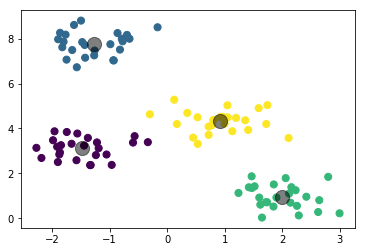

In [57]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Silhouette Score for K for K-Means

The silhouette score (https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) is a method for optimising $K$ in a clustering setting. It computes how similar objects are to other objects within their cluster compared to how similar they are to points in neighbouring clusters.

__Question__: make a plot of Silhouette scores for the example data above. Vary the data generation parameters. Does the optimal $K$ from Silhouette agree with that from inspecting the inertia?

For n_clusters = 2 The average silhouette_score is : 0.37587450298525565
For n_clusters = 3 The average silhouette_score is : 0.39121483822975456
For n_clusters = 4 The average silhouette_score is : 0.388013727159476
For n_clusters = 5 The average silhouette_score is : 0.3793543815752059
For n_clusters = 6 The average silhouette_score is : 0.3907139499754379
For n_clusters = 7 The average silhouette_score is : 0.387923813885334


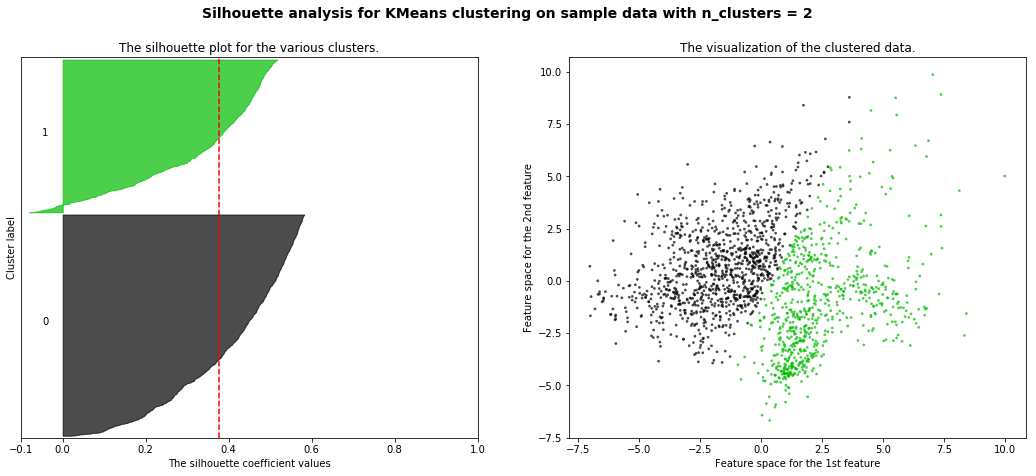

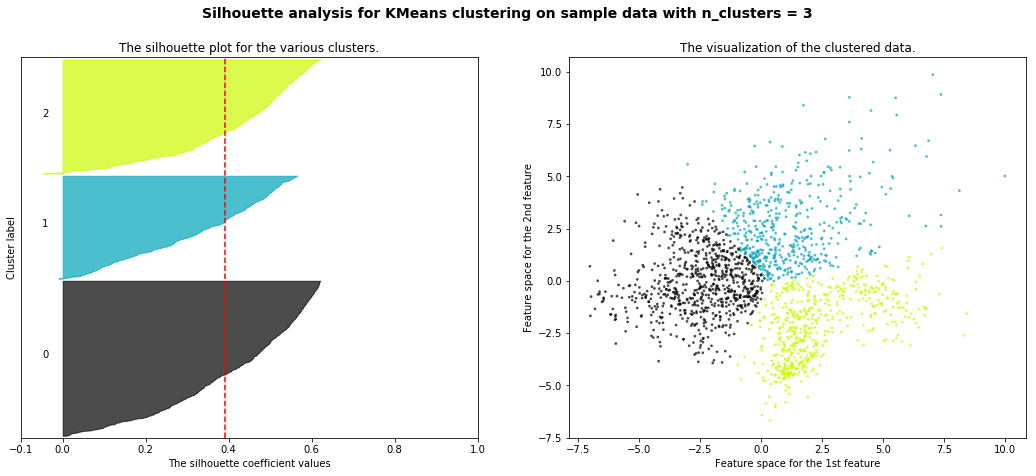

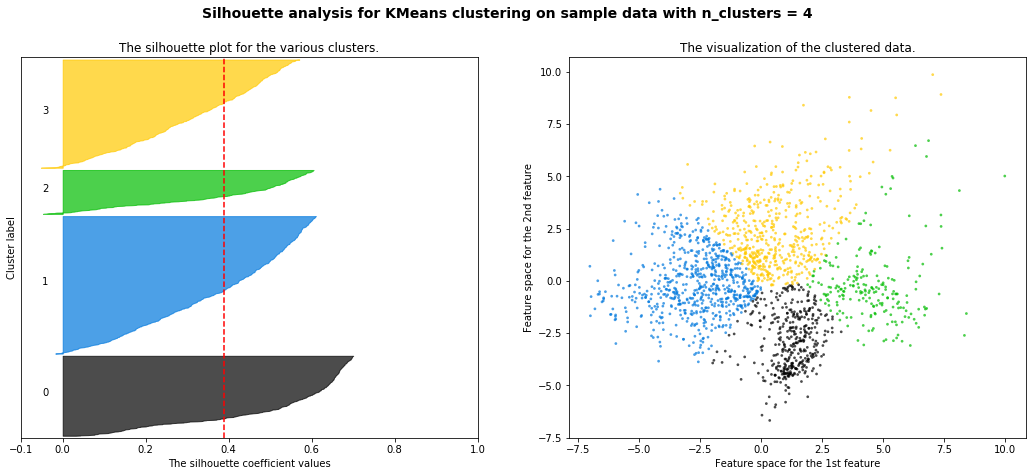

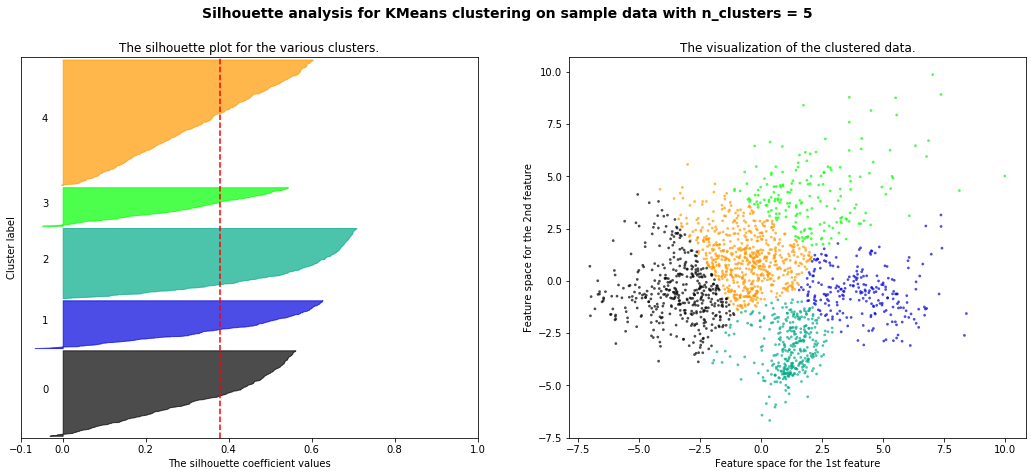

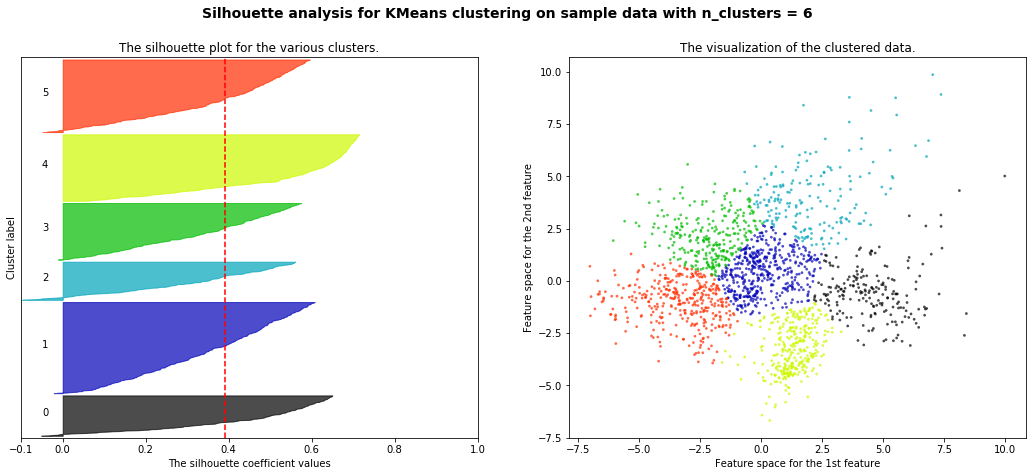

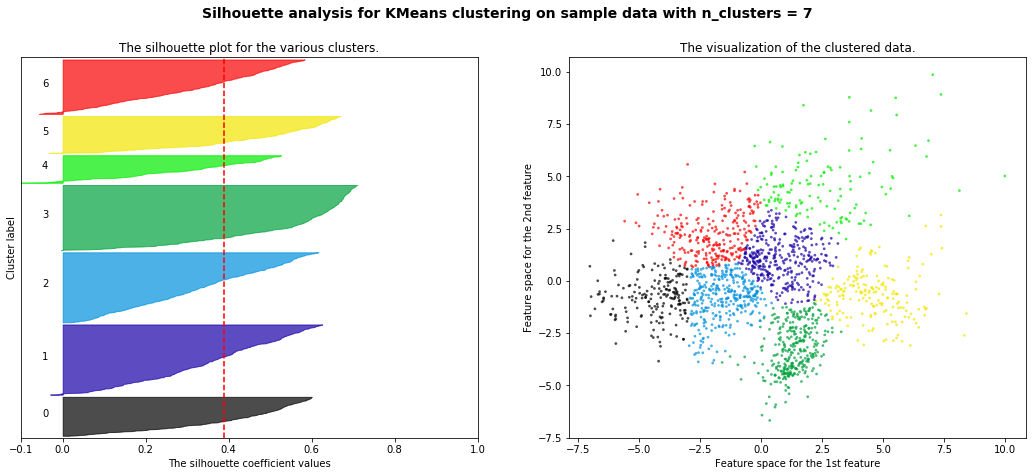

In [322]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


for n_clusters in range(2,8):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## BIC for K-means

Although K-means is not optimised by maximising the likelihood, you can compute a quanitity that is interpretable as BIC. To do this, compute:

$KD\ln(N) - E$

where $E$ is the negative of the `inertia_` property of K-means, and $D$ is the dimension of the data (in our case, 2).

__Question:__ for the data above, plot BIC for K-means as a function of $K$ for $K$ varying from 1 to 30. Does it agree with the previous answers?


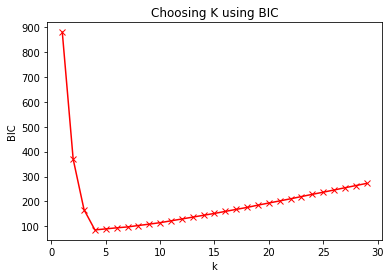

In [84]:
def bic(K, data):

    N = len(data)
    D = 2
    
    kmeans = KMeans(n_clusters=K)
    kmeans = kmeans.fit(X)
    E = -(kmeans.inertia_)
    
    return K*D*np.log(N) - E

K_vals = range(1,30)
bic_vals = []
for k in K_vals:
#     print(k, bic(k, X))
    bic_vals.append(bic(k, X))
    

plt.plot(K_vals, bic_vals, 'rx-')
plt.xlabel('k')
plt.ylabel('BIC')
plt.title('Choosing K using BIC')
plt.show()
    

# Mixture Models

Statistical mixture models are somewhat related to K-means but place the clustering problem within a statistical framework.

We will use Gaussian mixtures: models in which data from each cluster is assumed to come from a different Gaussian. With mixture models we have two model selection challenges: choosing $K$ and choosing the form of the Gaussian covariance matrices:

- spherical: the covariance matrices are of the form $\sigma^2\mathbf{I}$ (where $\mathbf{I}$ is an identity), i.e. the variance is the same in all dimensions and there is no correlation structure
- diagonal: there is no correlation structure, but the variance can be different in each dimension
- tied: all Gaussians share the same covariance matrix
- full: each Gaussian can have a different covariance matrix that can have full correlation structure

See https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html

To create a Gaussian mixture object using sklearn with (say) a tied covariance structure, use:

```{python}
from sklearn import mixture
gmm = mixture.Gaussian(n_components = K,covariance_type='cv_type')
```

__Note__
- the `mixture.Gaussian` object has methods to compute BIC and AIC (`gmm.bic(X)` etc)
- you can also perform cross validation with a mixture, but computing the likelihood on held-out observations. The likelihood is the standard mixture likelihood:

$L = \prod_n \sum_k \pi_k p(x_n|k)$

where the product is over the held-out data, the sum is over the clusters, $\pi_k$ is the prior weight of cluster k (`gmm.weights_`) and $p(x_n|k)$ is the Gaussian likelihood of the nth observation in the kth cluster.

## Additional imports...

In [92]:
import numpy as np
import itertools
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from sklearn import mixture

### Load a real data set

In [93]:
digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

### Useful code to plot a single digit

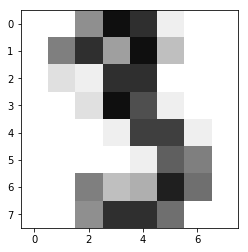

In [94]:
# method to plot a single digit
def plot_digit(digit_data):
    im = plt.imshow(digit_data.reshape(8,8), cmap='binary')
    im.set_clim(0, 16)

# example - plot the third one in the dataset    
plot_digit(digits.data[3])

### Project the data into 2D

In [95]:
reduced_data = PCA(n_components=2).fit_transform(data)

([], <a list of 0 Text yticklabel objects>)

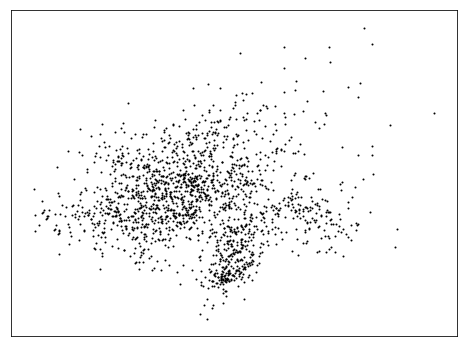

In [96]:
plt.figure(figsize=(8, 6))
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

## The task

Explore different model selection strategies to determine the number of clusters required for a Gaussian mixture clustering of this data (in the 2D PCA space) **and** the correct choice of covariance matrix structure (from the options listed above).

You should try multiple methods (BIC, AIC, Silhouette, and cross-validation)

Explore the clusterings suggested by each method, and look to see which digits are being grouped or split (if the optimal number is not 10 (digits 0-9).

The following method might be useful to plot the result of the clustering(s) and nice covariance ellipses

In [273]:
from matplotlib.patches import Ellipse
from matplotlib import colors as mcolors
import random

deletecolors = ['white', 'lightgrey', 'oldlace', 'seashell', 'slategray', 'lightslategrey','floralwhite']


colors = [x for x in (mcolors.CSS4_COLORS).keys() if x not in deletecolors]

random.shuffle(colors)

def make_ellipses(gmm, ax):
    
    for n, color in enumerate(colors):
        
        if n < len(gmm.covariances_):

            if gmm.covariance_type == 'full':
                covariances = gmm.covariances_[n][:2, :2]
            elif gmm.covariance_type == 'tied':
                covariances = gmm.covariances_[:2, :2]
            elif gmm.covariance_type == 'diag':
                covariances = np.diag(gmm.covariances_[n][:2])
            elif gmm.covariance_type == 'spherical':
                covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]

            v, w = np.linalg.eigh(covariances)
            u = w[0] / np.linalg.norm(w[0])
            angle = np.arctan2(u[1], u[0])
            angle = 180 * angle / np.pi  # convert to degrees
            v = 2. * np.sqrt(2.) * np.sqrt(v)
            ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                      180 + angle, color=color)
            ell.set_clip_box(ax.bbox)
            ell.set_alpha(0.5)
            ax.add_artist(ell)
            ax.set_aspect('equal', 'datalim')

In [268]:
colors

['mediumspringgreen',
 'mediumpurple',
 'lightsalmon',
 'lawngreen',
 'antiquewhite',
 'linen',
 'midnightblue',
 'lightgoldenrodyellow',
 'darkred',
 'indigo',
 'gainsboro',
 'coral',
 'aquamarine',
 'darkgoldenrod',
 'orange',
 'greenyellow',
 'pink',
 'lime',
 'steelblue',
 'cornflowerblue',
 'mintcream',
 'lavender',
 'darkolivegreen',
 'darkgreen',
 'mediumslateblue',
 'darkorange',
 'rosybrown',
 'tomato',
 'mediumvioletred',
 'darkgray',
 'palevioletred',
 'lightgray',
 'mediumturquoise',
 'cyan',
 'goldenrod',
 'tan',
 'burlywood',
 'purple',
 'yellowgreen',
 'ghostwhite',
 'ivory',
 'lightseagreen',
 'mistyrose',
 'navy',
 'olive',
 'cadetblue',
 'mediumorchid',
 'chartreuse',
 'chocolate',
 'plum',
 'darkslategray',
 'lightcoral',
 'salmon',
 'palegreen',
 'rebeccapurple',
 'darksalmon',
 'beige',
 'grey',
 'lemonchiffon',
 'firebrick',
 'darkviolet',
 'turquoise',
 'bisque',
 'orangered',
 'khaki',
 'saddlebrown',
 'deeppink',
 'darkturquoise',
 'black',
 'darkcyan',
 'bluev

# Determining Number of Clusters

## 1) Using BIC and AIC

In [269]:
from sklearn.mixture import GaussianMixture as gmm

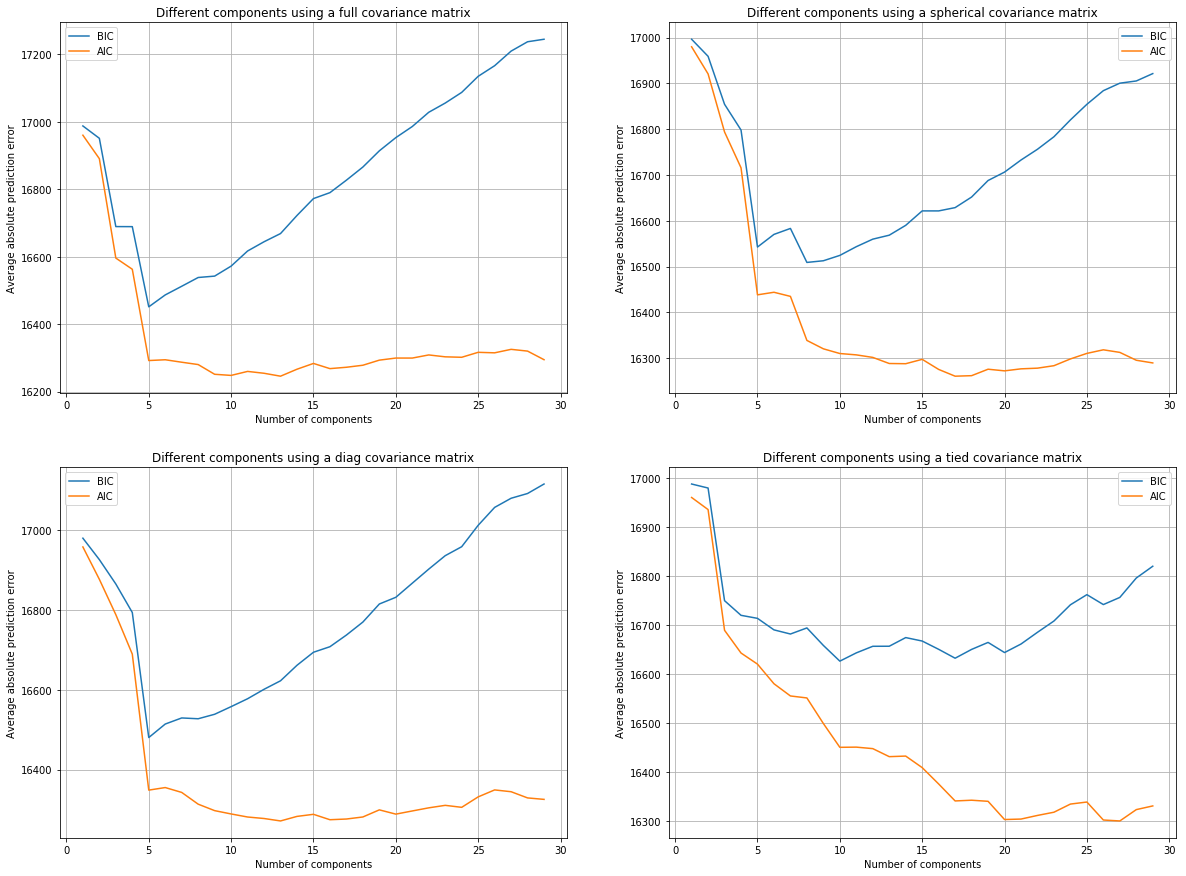

In [270]:
fig = plt.figure(figsize=(20, 15))

min_bic = {}
min_aic = {}

X = reduced_data
n_components = np.arange(1, 30)
cov_types = ['full', 'spherical', 'diag', 'tied']

for i, cov in enumerate(cov_types):
    
    i+= 1

    models = [gmm(n, covariance_type=cov, random_state=0).fit(X)
              for n in n_components]
    
    bics = [m.bic(X) for m in models]
    aics = [m.aic(X) for m in models]
    
    min_bic[cov] = (bics.index(min(bics)) + 1, min(bics))
    min_aic[cov] = (aics.index(min(aics)) + 1, min(aics))

    
    plt.subplot(2, 2, i)
    plt.plot(n_components, bics, label='BIC')
    plt.plot(n_components, aics, label='AIC')
    plt.legend(loc='best')
    plt.grid(True)
    ax = plt.gca()
    ax.set_xlabel('Number of components')
    ax.set_ylabel('Average absolute prediction error')
    ax.set_title('Different components using a {} covariance matrix'.format(cov))


In [271]:
print('BIC \nmatrix\tcomponents\tminimum bic\n')

for covtype, (n, minimum) in min_bic.items():
    if covtype == 'spherical':
        covtype = 'spher'
    print('{}\t{}\t\t{:.3f}'.format(covtype, n, minimum))
    
print('\n\n')

print('AIC\nmatrix\tcomponents\tminimum aic\n')

for covtype, (n, minimum) in min_aic.items():
    if covtype == 'spherical':
        covtype = 'spher'
    print('{}\t{}\t\t{:.3f}'.format(covtype, n, minimum))

BIC 
matrix	components	minimum bic

full	5		16451.340
spher	8		16509.231
diag	5		16480.198
tied	10		16626.493



AIC
matrix	components	minimum aic

full	13		16245.639
spher	17		16260.825
diag	13		16270.985
tied	27		16300.478


	PLOTS USING OPTIMAL HYPERPARAMETERS FOUND USING BIC


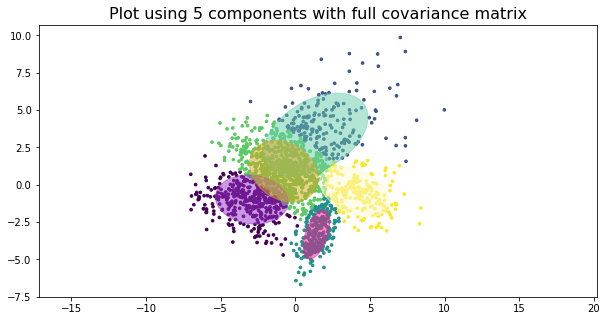

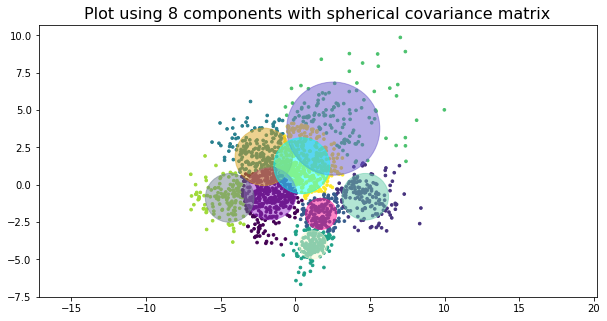

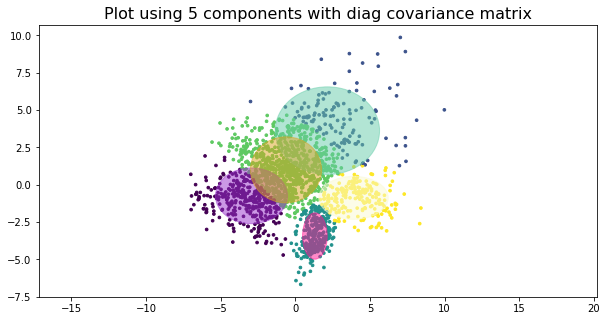

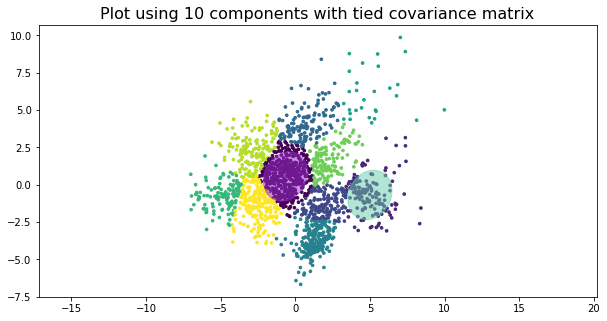

In [279]:
print('\tPLOTS USING OPTIMAL HYPERPARAMETERS FOUND USING BIC')
i = 1

for covtype, (n, minimum) in min_bic.items():
    
    g=gmm(n,  covariance_type=covtype, random_state=0).fit(X) 
    plt.figure(figsize=(10,5))
    plt.scatter(X[:, 0], X[:, 1], c=g.predict(X), s=7, cmap='viridis')
    ax = plt.gca()
    ax.set_title('Plot using {} components with {} covariance matrix'.format(n, covtype), fontsize=16)
    make_ellipses(g, plt.gca())
    
    i+=1 
    plt.show()

	PLOTS USING OPTIMAL HYPERPARAMETERS FOUND USING BIC


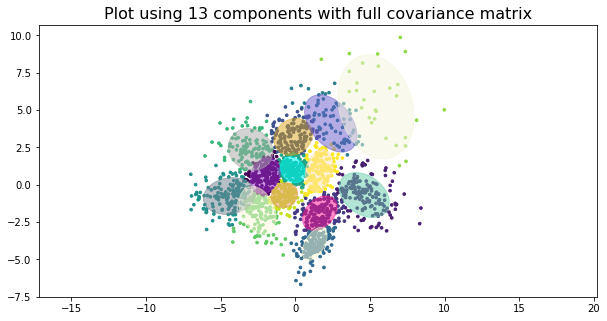

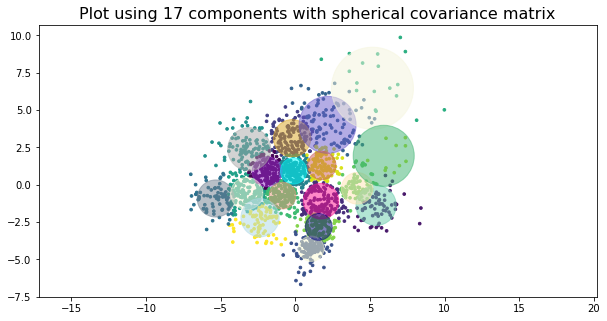

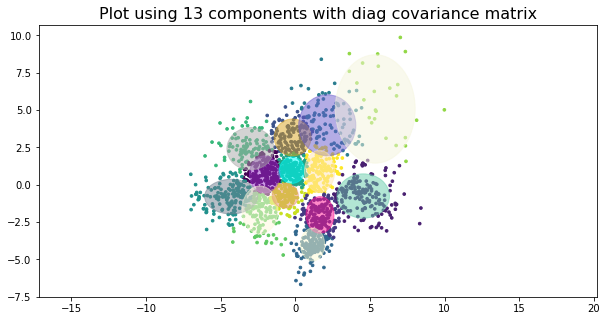

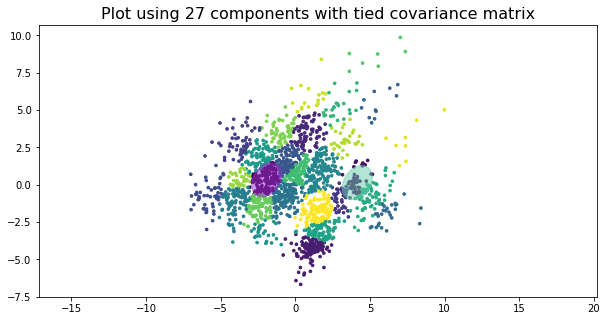

In [280]:
print('\tPLOTS USING OPTIMAL HYPERPARAMETERS FOUND USING BIC')
i = 1

for covtype, (n, minimum) in min_aic.items():
    
    g=gmm(n,  covariance_type=covtype, random_state=0).fit(X) 
    plt.figure(figsize=(10,5))
    plt.scatter(X[:, 0], X[:, 1], c=g.predict(X), s=7, cmap='viridis')
    ax = plt.gca()
    ax.set_title('Plot using {} components with {} covariance matrix'.format(n, covtype), fontsize=16)
    make_ellipses(g, plt.gca())
    
    i+=1 
    plt.show()

### Using BIC, best hyperparameters are n_components=5 with full covariance matrix
### Using AIC, best hypterparameters are n_components=13 with full covariance matrix
<br>
<br>
<br>




## 2) Using Silhouette Analysis

In [156]:
from sklearn.metrics import silhouette_score

In [288]:
# silhouette scores per covarience matrix type
silhouette_scores = {}

X = reduced_data
n_components = np.arange(2, 30)

cov_types = ['full', 'spherical', 'diag', 'tied']

for cov in cov_types:
    
    sils=[]

    for n in n_components:
        temp = []
        for _ in range(iterations):
            g=gmm(n,  covariance_type=cov, random_state=0).fit(X) 
            labels=g.predict(X)
            sil=silhouette_score(X, labels, metric='euclidean')
            temp.append(sil)

        temp = np.array(temp)
        idx = np.argsort(temp)[:int(iterations/5)]
        val = np.mean(temp[idx])

        sils.append(val)
        
    silhouette_scores[cov] = sils

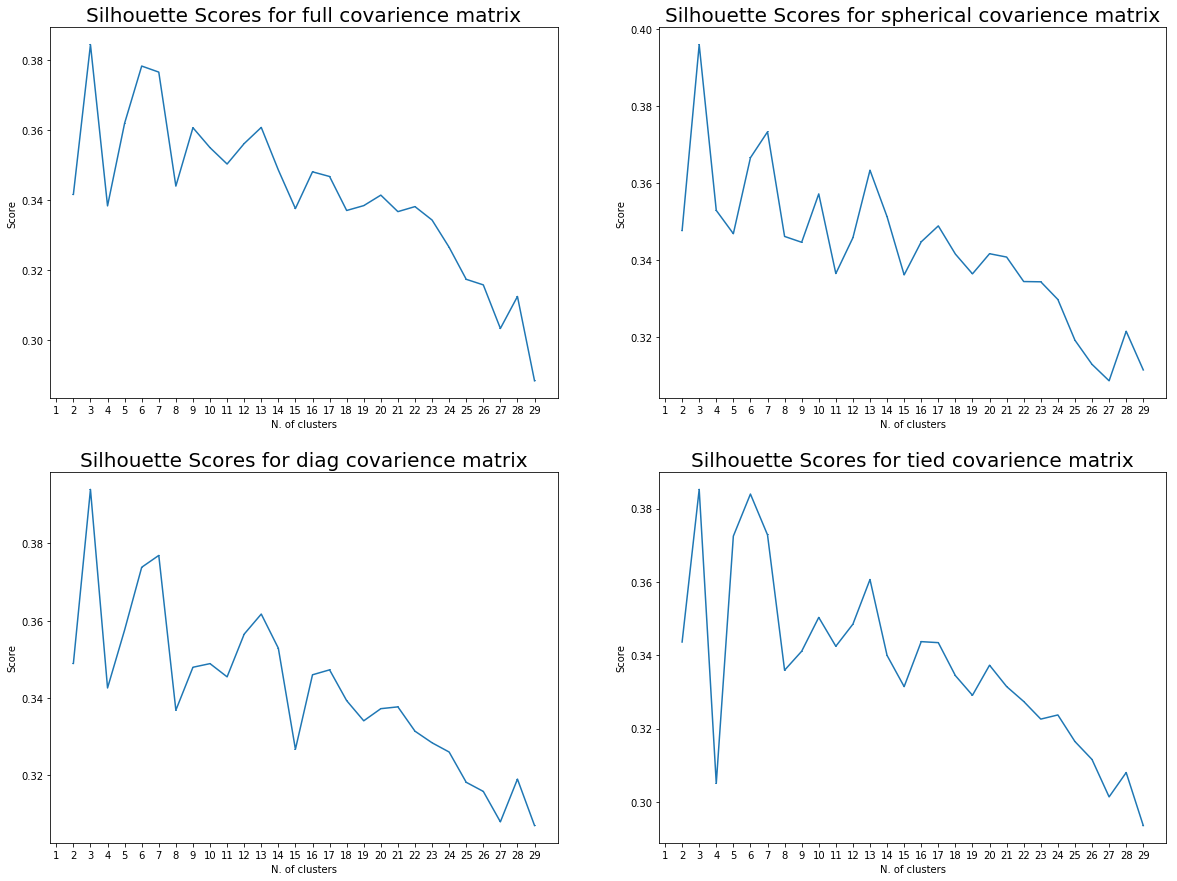

In [289]:
plt.figure(figsize=(20,15))

i = 1


for cov, sils in silhouette_scores.items():

    plt.subplot(2,2,i)

    plt.errorbar(n_components, sils, yerr=sils_err)
    plt.title("Silhouette Scores for {} covarience matrix".format(cov), fontsize=20)
    plt.xticks(n_clusters)
    plt.xlabel("N. of clusters")
    plt.ylabel("Score")
    
    i+=1

In [314]:
X = reduced_data

best_sil = {}

for cov in cov_types:
    
    sil_avgs = []
    
    max_avg = 0
    best_n = 0

    for n_components in range(2,20):

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_components + 1) * 10])

        g=gmm(n_components,  covariance_type=cov, random_state=0).fit(X) 
        labels=g.predict(X)

        silhouette_avg = silhouette_score(X, labels)
        
        if silhouette_avg > max_avg:
            max_avg = silhouette_avg
            best_n = n_components
    
    best_sil[cov] = (best_n, max_avg)
    

In [310]:
print('SILHOUETTE SCORES\nmatrix\tcomponents\tsil score')

for covtype, (n, score) in best_sil.items():
    if covtype == 'spherical':
        covtype = 'spher'
    print("{}\t{}\t\t{:.3f}".format(covtype
                                  , n, score))
    

SILHOUETTE SCORES
matrix	components	sil score
full	3		0.384
spher	3		0.396
diag	3		0.394
tied	3		0.385


	PLOTS USING OPTIMAL HYPERPARAMETERS FOUND USING SILHOUETTE SCORES


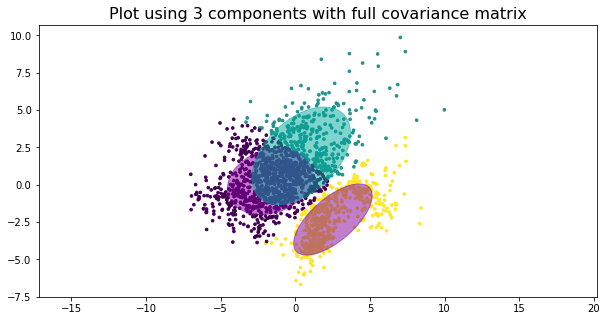

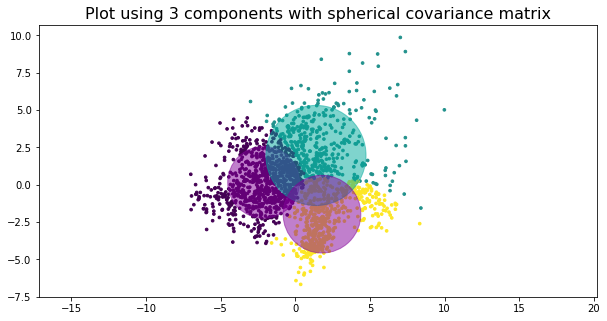

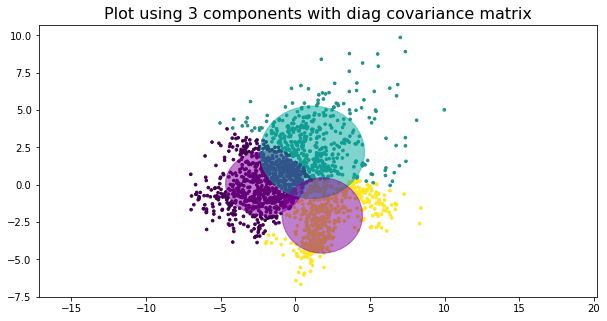

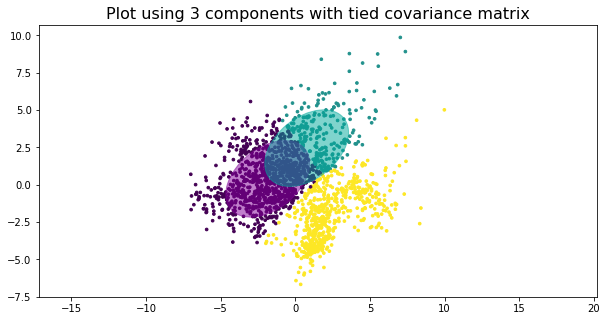

In [312]:
print('\tPLOTS USING OPTIMAL HYPERPARAMETERS FOUND USING SILHOUETTE SCORES')
i = 1

for covtype, (n, minimum) in best_sil.items():
    
    g=gmm(n,  covariance_type=covtype, random_state=0).fit(X) 
    plt.figure(figsize=(10,5))
    plt.scatter(X[:, 0], X[:, 1], c=g.predict(X), s=7, cmap='viridis')
    ax = plt.gca()
    ax.set_title('Plot using {} components with {} covariance matrix'.format(n, covtype), fontsize=16)
    make_ellipses(g, plt.gca())
    
    i+=1 
    plt.show()

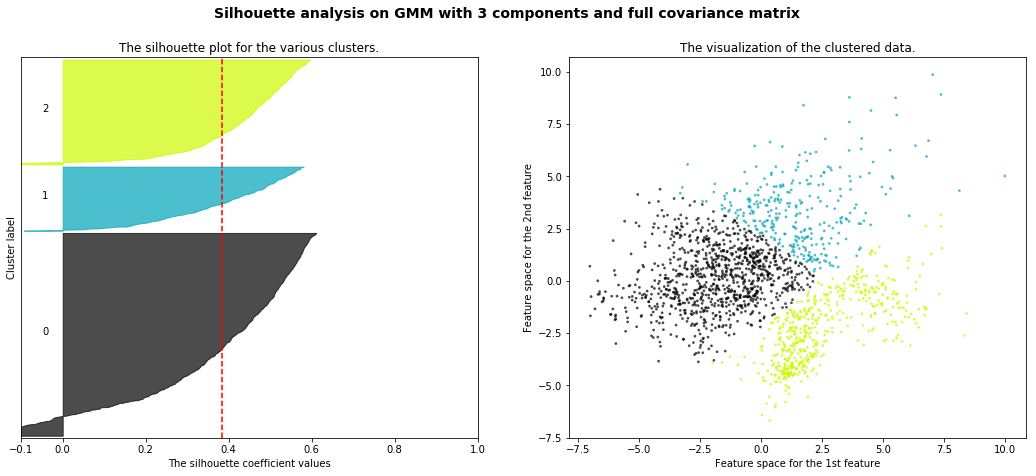

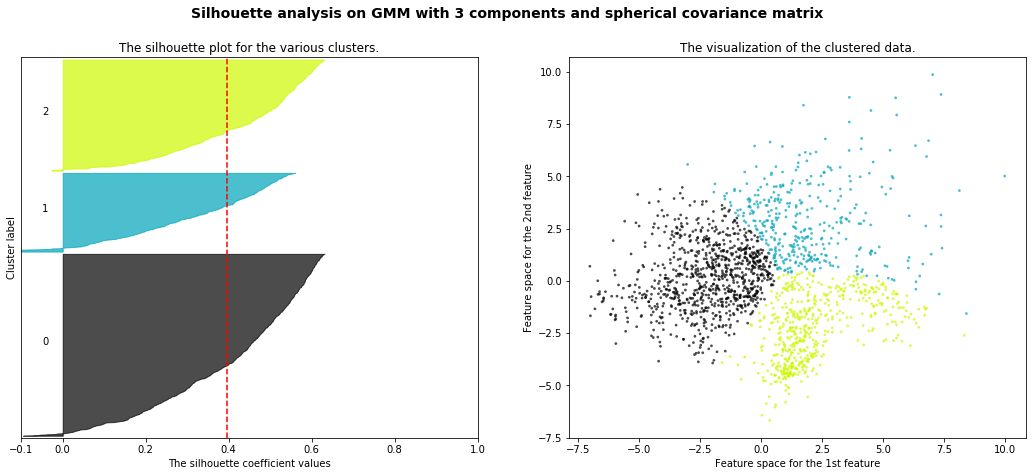

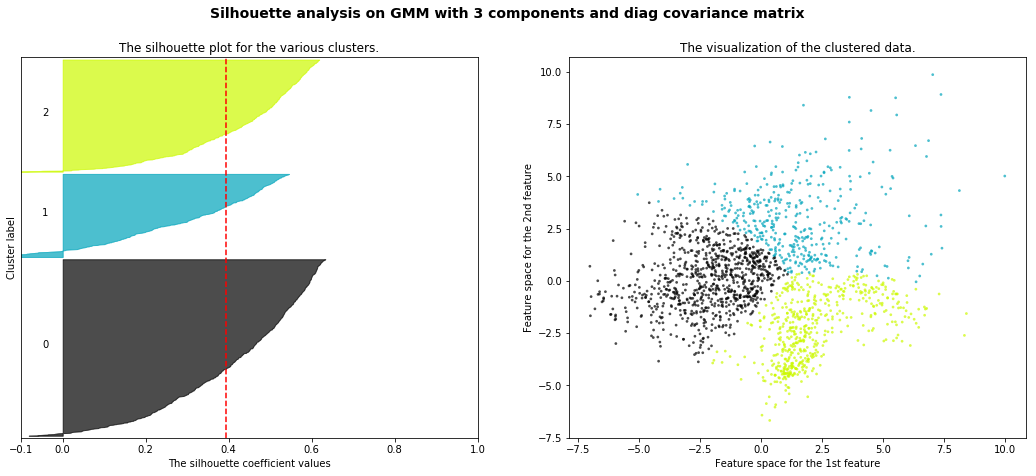

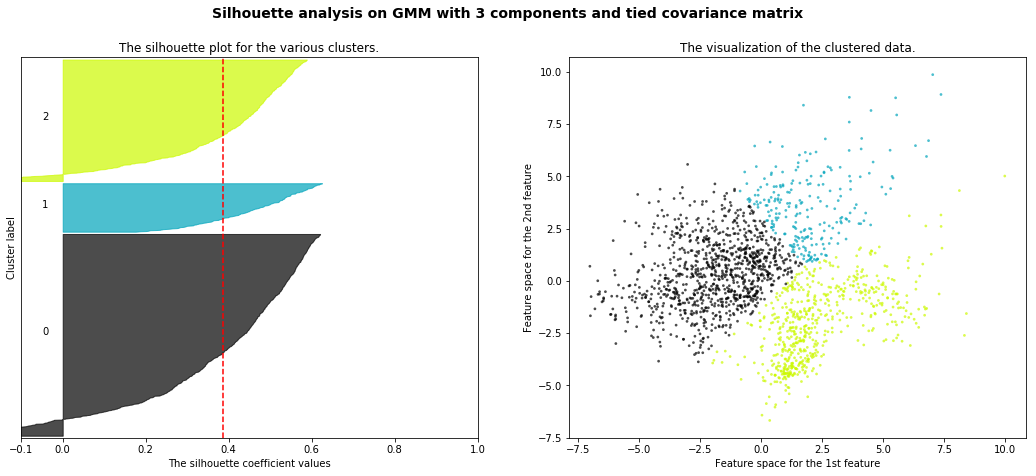

In [323]:
X = reduced_data

for covtype, (n_components, _) in best_sil.items():
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_components + 1) * 10])
    
    g=gmm(n_components,  covariance_type=covtype, random_state=0).fit(X) 
    labels=g.predict(X)

    silhouette_avg = silhouette_score(X, labels)
    sample_silhouette_values = silhouette_samples(X, labels)

    y_lower = 10
    for i in range(n_components):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_components)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(labels.astype(float) / n_components)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

 
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis on GMM with {} components and {} covariance matrix".format(n_components, covtype)),
                 fontsize=14, fontweight='bold')


plt.show()





### 3 components are optimal for each type of covariance matrix
### each produces similar clusters

### The spherical cov matrix with n=3 has the highest silhouette score, (optimal)
<br>
<br>

## 3) Cross Validation using Maximum Likelihood

In [327]:
from sklearn.model_selection import KFold, train_test_split

X = reduced_data


## 4) Bayesian Marginal Likelihood